In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [93]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
Cust_data = pd.read_excel(r'C:\Users\sairam\Downloads\analytics lab\case studies\machine learning cs\Market Insights analysis\Datasets\CustomersData.xlsx')

In [95]:
Discount = pd.read_csv(r'C:\Users\sairam\Downloads\analytics lab\case studies\machine learning cs\Market Insights analysis\Datasets\Discount_Coupon.csv')

In [96]:
Markting_spend = pd.read_csv(r'C:\Users\sairam\Downloads\analytics lab\case studies\machine learning cs\Market Insights analysis\Datasets\Marketing_Spend.csv')

In [97]:
Online_sales = pd.read_csv(r'C:\Users\sairam\Downloads\analytics lab\case studies\machine learning cs\Market Insights analysis\Datasets\Online_Sales.csv')

In [98]:
Tax_amount = pd.read_excel(r'C:\Users\sairam\Downloads\analytics lab\case studies\machine learning cs\Market Insights analysis\Datasets\Tax_amount.xlsx')

In [99]:
print(Cust_data.shape,Discount.shape,Markting_spend.shape,Online_sales.shape,Tax_amount.shape)

(1468, 4) (204, 4) (365, 3) (52924, 10) (20, 2)


### changes

In [100]:
Discount.columns = Discount.columns.str.replace(' ','')

In [101]:
Online_sales['Transaction_Date'] = pd.to_datetime(Online_sales['Transaction_Date'], format='%Y%m%d')

In [102]:
Markting_spend['Date'] = pd.to_datetime(Markting_spend['Date'], format='%m/%d/%Y')

In [103]:
Discount['Month'] = pd.to_datetime(Discount['Month'],format='%b')

In [104]:
Discount['Month'] = Discount['Month'].dt.month

In [105]:
Online_sales['Month'] = Online_sales['Transaction_Date'].dt.month

### end

# Merging

In [106]:
a = pd.merge(Cust_data,Online_sales,left_on='CustomerID',right_on='CustomerID',how='left')

In [107]:
b = pd.merge(a,Discount,on=['Month','Product_Category'],how='left')

In [108]:
c = pd.merge(b,Tax_amount,left_on='Product_Category',right_on='Product_Category',how='left')

In [109]:
df = pd.merge(c,Markting_spend,left_on='Transaction_Date',right_on='Date',how='left')

In [110]:
Online_sales.shape

(52924, 11)

In [111]:
df.shape

(52924, 20)

In [112]:
df.dtypes

CustomerID                      int64
Gender                         object
Location                       object
Tenure_Months                   int64
Transaction_ID                  int64
Transaction_Date       datetime64[ns]
Product_SKU                    object
Product_Description            object
Product_Category               object
Quantity                        int64
Avg_Price                     float64
Delivery_Charges              float64
Coupon_Status                  object
Month                           int64
Coupon_Code                    object
Discount_pct                  float64
GST                           float64
Date                   datetime64[ns]
Offline_Spend                   int64
Online_Spend                  float64
dtype: object

In [113]:
df.isnull().sum()

CustomerID               0
Gender                   0
Location                 0
Tenure_Months            0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Month                    0
Coupon_Code            400
Discount_pct           400
GST                      0
Date                     0
Offline_Spend            0
Online_Spend             0
dtype: int64

In [114]:
df = df.fillna(0)

# 1

In [115]:
df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Month', 'Coupon_Code', 'Discount_pct', 'GST', 'Date',
       'Offline_Spend', 'Online_Spend'],
      dtype='object')

In [116]:
df['Invoice'] = np.where(
    df['Coupon_Status'] == 'Used',
    ((df['Quantity'] * df['Avg_Price']) * (1 - df['Discount_pct']/100) * (1 + df['GST'])) + df['Delivery_Charges'],
    ((df['Quantity'] * df['Avg_Price']) * (1 + df['GST'])) + df['Delivery_Charges']
)

# 2

###    customer acquired 

In [117]:
x = pd.DataFrame(df[['Month','CustomerID']].groupby('Month')['CustomerID'].agg([('set', set)]).reset_index())

In [118]:
list_ = []
for i in range(12):
    cnt = len(x['set'][i])
    list_.append(cnt)

In [119]:
list_ = pd.DataFrame(list_,columns=['cnt'])

In [120]:
x = pd.concat([x,list_],axis=1)

In [121]:
x

,Month,set,cnt
0,1,"{17920, 14849, 15363, 17924, 17925, 17412, 174...",215
1,2,"{13831, 15880, 16905, 16393, 15373, 13838, 158...",109
2,3,"{17920, 16898, 14850, 13319, 12808, 14344, 158...",208
3,4,"{16385, 16898, 17411, 13319, 15881, 16907, 133...",224
4,5,"{15361, 16899, 16393, 15881, 13324, 17404, 133...",200
5,6,"{14849, 17412, 13829, 13317, 15366, 14344, 153...",259
6,7,"{13313, 17924, 13319, 15373, 13329, 15379, 174...",236
7,8,"{15370, 16395, 13842, 14867, 17428, 16923, 128...",300
8,9,"{16904, 17418, 17419, 16395, 16912, 16401, 153...",193
9,10,"{14849, 16387, 14341, 15373, 13837, 12829, 138...",210


In [122]:
# new customer count
f = []
for i in range(12):
    abc = len(x['set'].iloc[0+i].difference(*x['set'].iloc[:0+i]))
    f.append(abc)
f = pd.DataFrame(f,columns=['customer_acq_cnt'])

In [123]:
x = pd.concat([x,f],axis=1)

In [124]:
# Alternate method 
# for i in range(1, len(new_customers)):
#     acquired_customers.append(len(new_customers[i] - new_customers[i - 1]))

In [125]:
x

,Month,set,cnt,customer_acq_cnt
0,1,"{17920, 14849, 15363, 17924, 17925, 17412, 174...",215,215
1,2,"{13831, 15880, 16905, 16393, 15373, 13838, 158...",109,96
2,3,"{17920, 16898, 14850, 13319, 12808, 14344, 158...",208,177
3,4,"{16385, 16898, 17411, 13319, 15881, 16907, 133...",224,163
4,5,"{15361, 16899, 16393, 15881, 13324, 17404, 133...",200,112
5,6,"{14849, 17412, 13829, 13317, 15366, 14344, 153...",259,137
6,7,"{13313, 17924, 13319, 15373, 13329, 15379, 174...",236,94
7,8,"{15370, 16395, 13842, 14867, 17428, 16923, 128...",300,135
8,9,"{16904, 17418, 17419, 16395, 16912, 16401, 153...",193,78
9,10,"{14849, 16387, 14341, 15373, 13837, 12829, 138...",210,87


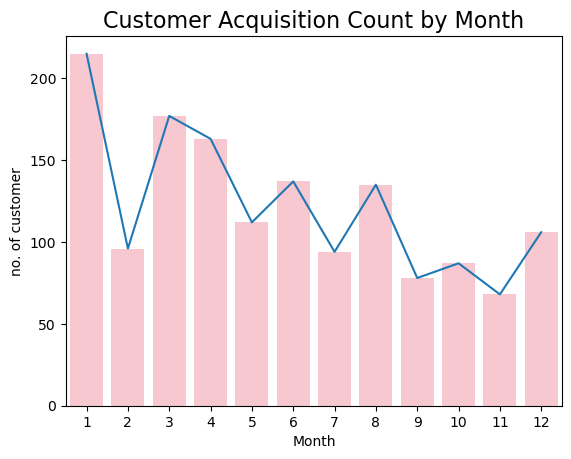

In [126]:
plt.plot(x['customer_acq_cnt'])
sns.barplot(x=x['Month'], y=x['customer_acq_cnt'],color='pink')
plt.xlabel('Month')
plt.ylabel('no. of customer')
plt.title('Customer Acquisition Count by Month', fontsize=16)
plt.show()

## customer retention month on month 

In [127]:
# for old customer count 
x['difference_by_previous'] =np.nan
for i in range(1,12):
    x['difference_by_previous'][i] =  len(x['set'][i].difference(x['set'][i-1]))

In [128]:
x

,Month,set,cnt,customer_acq_cnt,difference_by_previous
0,1,"{17920, 14849, 15363, 17924, 17925, 17412, 174...",215,215,NaN
1,2,"{13831, 15880, 16905, 16393, 15373, 13838, 158...",109,96,96.0
2,3,"{17920, 16898, 14850, 13319, 12808, 14344, 158...",208,177,197.0
3,4,"{16385, 16898, 17411, 13319, 15881, 16907, 133...",224,163,200.0
4,5,"{15361, 16899, 16393, 15881, 13324, 17404, 133...",200,112,175.0
5,6,"{14849, 17412, 13829, 13317, 15366, 14344, 153...",259,137,222.0
6,7,"{13313, 17924, 13319, 15373, 13329, 15379, 174...",236,94,178.0
7,8,"{15370, 16395, 13842, 14867, 17428, 16923, 128...",300,135,235.0
8,9,"{16904, 17418, 17419, 16395, 16912, 16401, 153...",193,78,149.0
9,10,"{14849, 16387, 14341, 15373, 13837, 12829, 138...",210,87,181.0


In [129]:
x['difference_by_previous'].sum()

1998.0

In [130]:
x['customer_retention_cnt'] = x['cnt']-x['difference_by_previous']

In [131]:
x[['Month','customer_acq_cnt','customer_retention_cnt']]

,Month,customer_acq_cnt,customer_retention_cnt
0,1,215,NaN
1,2,96,13.0
2,3,177,11.0
3,4,163,24.0
4,5,112,25.0
5,6,137,37.0
6,7,94,58.0
7,8,135,65.0
8,9,78,44.0
9,10,87,29.0


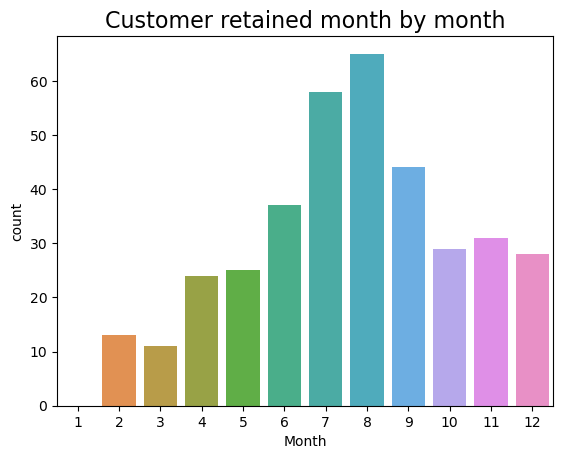

In [132]:
sns.barplot(x = x['Month'], y = x['customer_retention_cnt'])
plt.xlabel('Month')
plt.ylabel('count')
plt.title('Customer retained month by month', fontsize=16)
plt.show()

In [133]:
compare0 = x[['Month','customer_retention_cnt','customer_acq_cnt']]

In [134]:
x1 =[ i-0.35/2 for i in range(0,12)]
x2 =[ i+0.35/2 for i in range(0,12)]

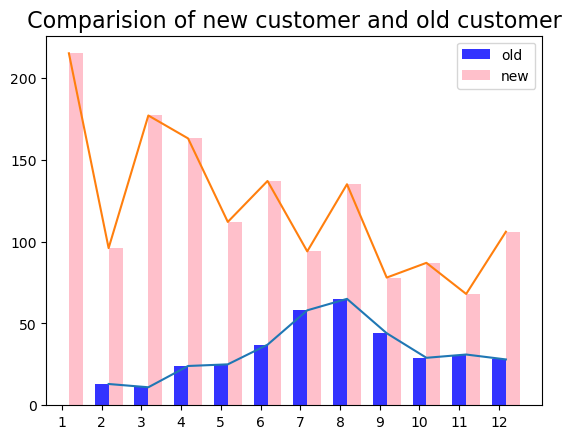

In [135]:
plt.plot(compare0['customer_retention_cnt'])
plt.bar(x1 ,compare0['customer_retention_cnt'],width=0.35,label = 'old', color ='blue',alpha=0.8,tick_label=compare0['Month'])
plt.plot(compare0['customer_acq_cnt'])
plt.bar(x2, compare0['customer_acq_cnt'],width=0.35,label = 'new',color ='pink')
plt.title(' Comparision of new customer and old customer ', fontsize = 16)
plt.legend()

# revenue from new/old customer 

#### for old revenue

In [136]:
# for old customer list 
x['dif_by_previous_list'] =np.nan
for i in range(1,12):
    x['dif_by_previous_list'][i] =  (x['set'][i].difference(x['set'][i-1]))

In [137]:
x['old_cust_list'] = np.nan
for i in range(1,12):
    x['old_cust_list'][i] = x['set'][i].difference(x['dif_by_previous_list'][i])

In [138]:
p = []
for i in range(12):
    if isinstance(x['old_cust_list'][i], float) and np.isnan(x['old_cust_list'][i]):
        p.append(0)
    else:
        p.append(df[df['CustomerID'].isin(x['old_cust_list'][i])]['Invoice'].sum())


In [139]:
p = pd.DataFrame(p)
p

,0
0,0.00000
1,414708.98147
2,350898.75579
3,363617.60017
4,384885.23657
5,566006.92218
6,732169.73982
7,768177.44589
8,539895.58825
9,517487.15979


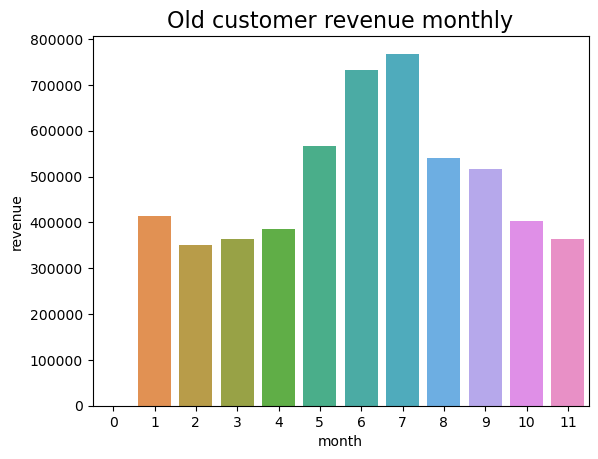

In [140]:
sns.barplot(x=p.index , y= p[0])
plt.title('Old customer revenue monthly',fontsize = 16)
plt.xlabel('month')
plt.ylabel('revenue')
plt.show()

#### for new revenew

In [141]:
# new customer list
x['new_cust_list'] = np.nan
for i in range(12):
    x['new_cust_list'][i] = (x['set'].iloc[0+i].difference(*x['set'].iloc[:0+i]))

In [142]:
unique_new_cut_list = set()

for i in range(12):
    if pd.notna(x['new_cust_list'][i]):
        unique_new_cut_list.update(x['new_cust_list'][i])

In [143]:
q = []
for i in range(12):
    q.append(df[df['CustomerID'].isin(x['new_cust_list'][i])]['Invoice'].sum())

In [144]:
q = pd.DataFrame(q)
q

,0
0,1.227511e+06
1,6.360731e+05
2,7.693070e+05
3,5.234645e+05
4,3.863069e+05
5,3.326816e+05
6,2.778105e+05
7,3.021801e+05
8,1.681078e+05
9,2.709502e+05


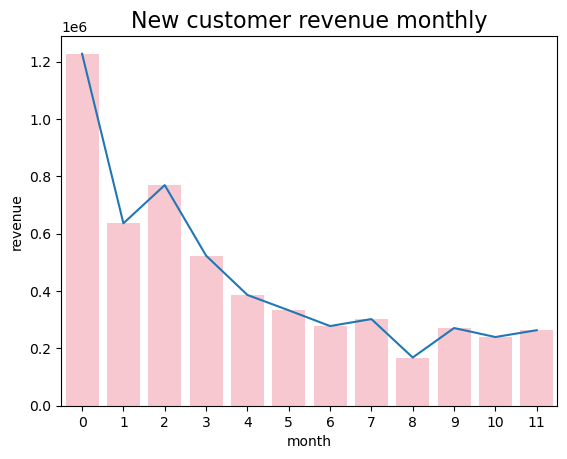

In [145]:
plt.plot(q[0])
sns.barplot(x=p.index , y= q[0],color='pink')
plt.title('New customer revenue monthly',fontsize = 16)
plt.xlabel('month')
plt.ylabel('revenue')
plt.show()

In [146]:
p = p.rename(columns={0: 'a'})
q = q.rename(columns={0: 'b'})

In [147]:
compare = pd.concat([p,q],axis=1)

In [148]:
l = ['jan','feb','mar','apr','may','june','july','aug','sept','oct','nov','dec']

In [149]:
compare['month'] = l
compare

,a,b,month
0,0.00000,1.227511e+06,jan
1,414708.98147,6.360731e+05,feb
2,350898.75579,7.693070e+05,mar
3,363617.60017,5.234645e+05,apr
4,384885.23657,3.863069e+05,may
5,566006.92218,3.326816e+05,june
6,732169.73982,2.778105e+05,july
7,768177.44589,3.021801e+05,aug
8,539895.58825,1.681078e+05,sept
9,517487.15979,2.709502e+05,oct


In [150]:
x1 =[ i-0.35/2 for i in range(0,12)]
x2 =[ i+0.35/2 for i in range(0,12)]

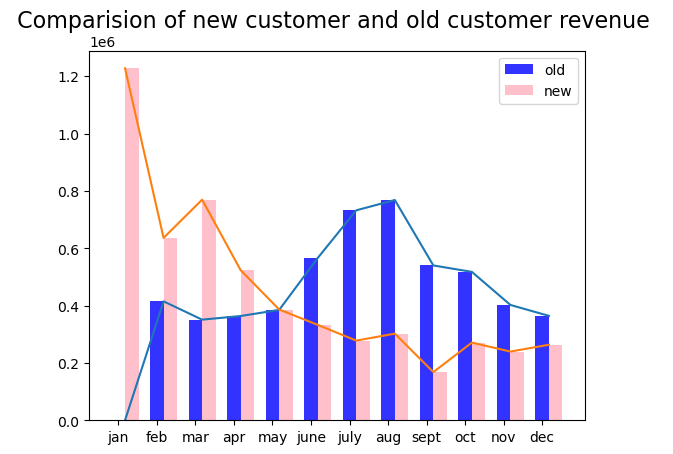

In [151]:
plt.plot(compare['a'])
plt.bar(x1 ,compare['a'],width=0.35,label = 'old', color ='blue',alpha=0.8,tick_label=compare['month'])
plt.plot(compare['b'])
plt.bar(x2, compare['b'],width=0.35,label = 'new',color ='pink')
plt.title(' Comparision of new customer and old customer revenue  ', fontsize = 16)
plt.legend()

#### 2.4

In [152]:
df[['Invoice','Coupon_Status','Discount_pct']].groupby('Coupon_Status')['Invoice'].sum().reset_index()

,Coupon_Status,Invoice
0,Clicked,2.925734e+06
1,Not Used,8.973176e+05
2,Used,1.574307e+06


In [153]:
df[['Invoice','Coupon_Status','Discount_pct']].groupby('Discount_pct')['Invoice'].sum().reset_index()

,Discount_pct,Invoice
0,0.0,3.694934e+04
1,10.0,1.888318e+06
2,20.0,1.752978e+06
3,30.0,1.719114e+06


#### 2.5

In [154]:
# Analyse KPI’s like Revenue, number of orders, average order value, number of
# customers (existing/new), quantity, by category, by month, by week, by day etc…

In [155]:
df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Month', 'Coupon_Code', 'Discount_pct', 'GST', 'Date',
       'Offline_Spend', 'Online_Spend', 'Invoice'],
      dtype='object')

In [156]:
# revenue by number of customers (existing/new) --- alreday done 

In [157]:
df['weekday'] = df['Transaction_Date'].dt.weekday

In [158]:
df.groupby('Product_Category')['Invoice'].sum()
df.groupby('Product_Category')['Quantity'].count()
df.groupby(['Month','weekday'])['Invoice'].sum()

Month  weekday
1      0           25158.41259
       1           51112.55916
       2           92969.76688
       3          109360.36863
       4           74108.67188
                      ...     
12     2          100152.42999
       3           80019.89224
       4           89351.48125
       5           76170.11755
       6           97131.91134
Name: Invoice, Length: 84, dtype: float64

#### 2.6

In [159]:
#  Understand the trends/seasonality of sales by category, location, month etc…

In [160]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Assuming df is your DataFrame with 'Month' and 'Invoice' columns

# # Seasonal Decomposition
# result = seasonal_decompose(df['Invoice'], model='additive', period=12)  # Assuming monthly data with a yearly seasonality
# seasonal_component = result.seasonal
# trend_component = result.trend


In [161]:
a = df.groupby(['Location','Month'])['Invoice'].sum().reset_index()

In [162]:
unique_name = a['Location'].unique()

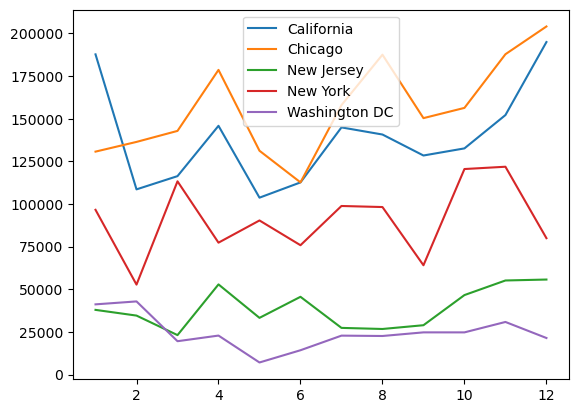

In [163]:
for i in range(5):
    data = a[a['Location']==unique_name[i]]
    plt.plot(data['Month'],data['Invoice'],label=unique_name[i])
    plt.legend()

In [164]:
a = df.groupby(['Product_Category','Month'])['Invoice'].sum().reset_index()

In [165]:
unique_name = ['Nest-USA', 'Apparel', 'Nest', 'Office', 'Drinkware']

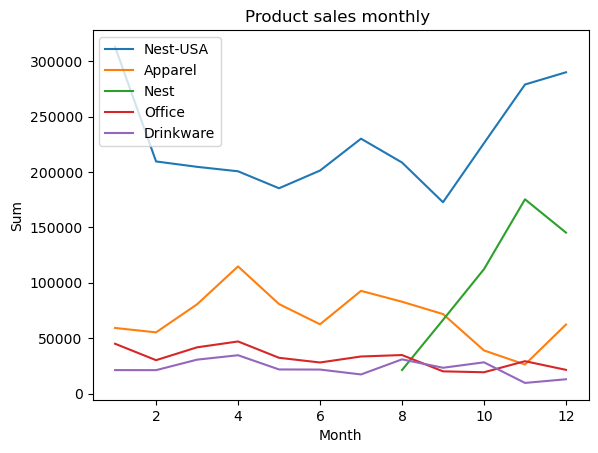

In [166]:
for i in range(5):
    data = a[a['Product_Category']==unique_name[i]]
    plt.plot(data['Month'],data['Invoice'],label=unique_name[i])
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Sum')
    plt.title('Product sales monthly ')

#### 2.7

In [167]:
#  How number order varies and sales with different days?

In [168]:
a = df.groupby(['Month','Product_Category'])['Invoice'].sum().reset_index()
a

,Month,Product_Category,Invoice
0,1,Accessories,63.22700
1,1,Android,103.12760
2,1,Apparel,59198.56210
3,1,Backpacks,336.02900
4,1,Bags,15655.28456
...,...,...,...
202,12,Nest-Canada,5411.54060
203,12,Nest-USA,290133.51300
204,12,Notebooks & Journals,867.79000
205,12,Office,21365.59620


In [169]:
a.loc[a.groupby('Month')['Invoice'].idxmax()]

,Month,Product_Category,Invoice
15,1,Nest-USA,313029.0931
33,2,Nest-USA,209596.7690
52,3,Nest-USA,204728.6500
71,4,Nest-USA,200699.5500
90,5,Nest-USA,185375.2200
108,6,Nest-USA,201367.4900
126,7,Nest-USA,230154.8700
145,8,Nest-USA,208623.1900
162,9,Nest-USA,172747.8700
178,10,Nest-USA,226107.0300


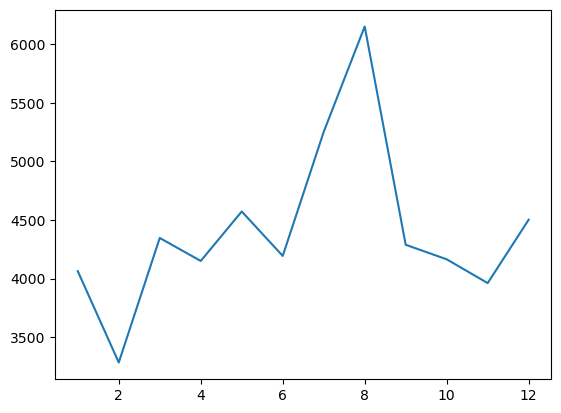

In [170]:
plt.plot(df.groupby('Month')['Transaction_ID'].count())

#### 2.8

In [171]:
# Calculate the Revenue, Marketing spend, percentage of marketing spend out of
# revenue, Tax, percentage of delivery charges by month.

In [172]:
df['total_marketing_spend'] = df['Offline_Spend']+df['Online_Spend']

In [173]:
df.groupby('Month')['total_marketing_spend'].sum()/df.groupby('Month')['Invoice'].sum()  

Month
1     40.585223
2     42.225849
3     42.041317
4     45.352850
5     47.936847
6     51.593891
7     45.629386
8     59.659353
9     48.567760
10    42.715612
11    38.511787
12    52.083729
dtype: float64

In [174]:
df.groupby('Month')['Delivery_Charges'].sum()/df['Delivery_Charges'].sum() * 100

Month
1     10.642937
2      8.841807
3     10.922765
4      7.452233
5      7.436860
6      6.739349
7      8.753299
8     10.976594
9      7.366661
10     8.257094
11     5.804868
12     6.805534
Name: Delivery_Charges, dtype: float64

In [175]:
df.groupby('Month')['total_marketing_spend'].sum()/df['GST'].sum() *100 

Month
1     275638.384584
2     217752.174905
3     239913.516645
4     297674.678043
5     240899.639177
6     256018.239512
7     283420.610087
8     390180.298500
9     264708.548831
10    282284.367075
11    289982.305090
12    398134.468311
Name: total_marketing_spend, dtype: float64

#### 2.9

In [176]:
#  How marketing spend is impacting on revenue?

In [177]:
df['Invoice'].corr(df['total_marketing_spend'])

0.04226203571204476

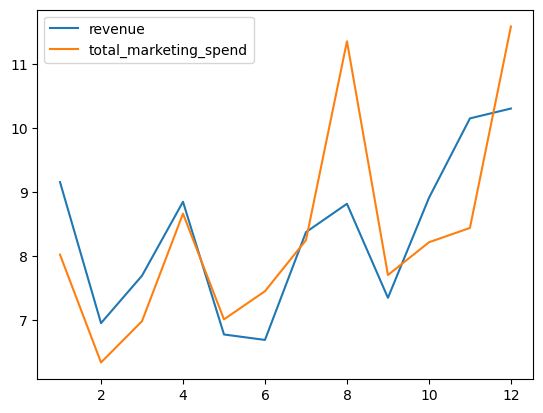

In [84]:
plt.plot(df.groupby('Month')['Invoice'].sum() / df['Invoice'].sum() *100 , label = 'revenue')
plt.plot(df.groupby('Month')['total_marketing_spend'].sum() /  df['total_marketing_spend'].sum() *100 , label = 'total_marketing_spend')
plt.legend()

#### 2.10

In [85]:
#  Which product was appeared in the transactions?

In [86]:
df.groupby('Transaction_ID')['Product_SKU'].agg(max).reset_index()

,Transaction_ID,Product_SKU
0,16679,GGOENEBJ079499
1,16680,GGOENEBJ079499
2,16681,GGOEGFKQ020399
3,16682,GGOEYAAB031816
4,16684,GGOENEBQ079199
...,...,...
25056,48493,GGOENEBB078899
25057,48494,GGOEGAEB091117
25058,48495,GGOENEBQ084699
25059,48496,GGOENEBQ079199


#### 2.11

In [87]:
#  Which product was purchased mostly based on the quantity?

In [88]:
df.groupby('Product_Category')['Quantity'].sum().nlargest(5)

Product_Category
Office       88383
Apparel      32438
Drinkware    30501
Lifestyle    24881
Nest-USA     21430
Name: Quantity, dtype: int64

# 3. Performing Customer Segmentation

In [89]:
# Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver,
# Standard customers and define strategy on the same. 

In [90]:
df[['CustomerID','Transaction_Date','Invoice']].head(1)

,CustomerID,Transaction_Date,Invoice
0,17850,2019-01-01,158.6729


In [91]:
now = df['Transaction_Date'].max()+ pd.Timedelta(days=1)
now

Timestamp('2020-01-01 00:00:00')

In [92]:
recency = (now - df.groupby('CustomerID')['Transaction_Date'].max()).dt.days.reset_index()
recency = recency.rename(columns={'Transaction_Date' : 'Recency'})

In [93]:
frequency = df.groupby('CustomerID')['Transaction_Date'].count().reset_index()
frequency = frequency.rename(columns={'Transaction_Date' : 'Frequency'})

In [94]:
monetary = df.groupby('CustomerID')['Invoice'].sum().reset_index()
monetary = monetary.rename(columns={'Invoice' : 'Monetary'})

In [95]:
a = pd.merge(recency,frequency,on=['CustomerID'])
rfm_df = a.merge(monetary,on=['CustomerID'])

In [96]:
# [(0.636, 92.0] < (92.0, 183.0] < (183.0, 274.0] < (274.0, 365.0]]
rfm_df['recency_score'] = pd.cut(rfm_df['Recency'],bins=4,labels=False)+1


# [(0.306, 174.5] < (174.5, 348.0] < (348.0, 521.5] < (521.5, 695.0]]
rfm_df['frequency_score'] = pd.cut(rfm_df['Frequency'],bins=4,labels=False)+1


# [(-80.204, 21805.467] < (21805.467, 43603.943] < (43603.943, 65402.42] < (65402.42, 87200.896]]
rfm_df['monetary_score'] = pd.cut(rfm_df['Monetary'],bins=4,labels=False)+1


In [97]:
rfm_df['RFM_Segment'] = rfm_df['recency_score'] * 10 + rfm_df['frequency_score'] * 10 + rfm_df['monetary_score']*10

In [98]:
def segment(RFM_Segment):
    if RFM_Segment<=40:
        return 'Standard'
    elif (RFM_Segment>40) & (RFM_Segment<=70):
        return 'Silver'
    elif (RFM_Segment>70) & (RFM_Segment<=90):
        return 'Premium'
    else:
        return 'Gold'

In [99]:
rfm_df['RFM_Segment'] = rfm_df['RFM_Segment'].apply(segment)

In [100]:
df = pd.merge(df,rfm_df,on=['CustomerID'],how='left')

# K-mean

In [101]:
#  Scientific (Using K-Means) & Understand the profiles. Define strategy for each
# # segment

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
d = rfm_df[['Recency','Frequency','Monetary']]

In [104]:
std_scalar = StandardScaler()
std = std_scalar.fit_transform(d)
d = pd.DataFrame(std,columns=['Recency', 'Frequency', 'Monetary'])

In [105]:
from sklearn.cluster import k_means, KMeans

In [106]:
kmean = KMeans(n_clusters=3)
kmean = kmean.fit(d)
pd.Series(kmean.labels_)
d['label'] = pd.Series(kmean.labels_)
d.head()

,Recency,Frequency,Monetary,label
0,-0.365961,-0.669410,-0.599185,1
1,-0.837001,0.470788,2.055096,1
2,-0.699614,-0.256579,-0.340022,1
3,-1.249160,-0.374531,-0.378030,1
4,-0.365961,-0.001018,-0.285630,1


In [107]:
from sklearn.metrics import silhouette_score , silhouette_samples 

In [108]:
kmean.inertia_

1900.2502582527304

In [109]:
silhouette_score(d.iloc[:,:-1],d['label'])

0.3986812074309163

#### Iterate

In [110]:
inertia_list = []
silhouette_list = []

for i in range(1,6):
    kmean = KMeans(n_clusters=i)
    kmean = kmean.fit(d)
    inertia_list.append(kmean.inertia_)
    
    if i > 1 :
        lab = kmean.labels_
        abc = silhouette_score(d.iloc[:,:-1],lab) 
        silhouette_list.append(abc)
    else :
        silhouette_list.append(np.nan) 

fram = pd.DataFrame({'k': range(1,6), 'inertia':inertia_list, 'sil_score':silhouette_list})
fram

,k,inertia,sil_score
0,1,4782.980926,NaN
1,2,3183.543168,0.376274
2,3,1900.250258,0.398681
3,4,1193.931181,0.434472
4,5,980.976671,0.420059


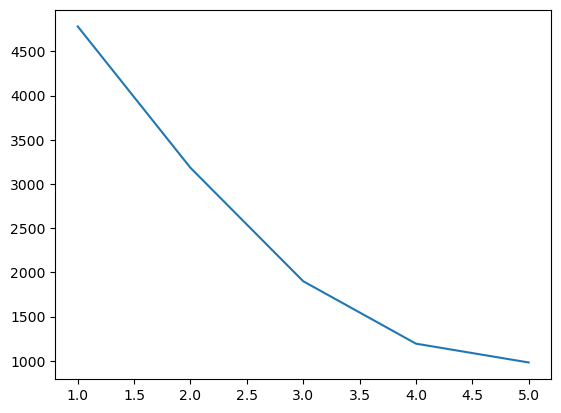

In [111]:
plt.plot(fram['k'],fram['inertia'])

    k = 4 is best and sil_score is also high for that 

In [112]:
kmean = KMeans(n_clusters=4)
kmean = kmean.fit(d)
pd.Series(kmean.labels_)
d['label'] = pd.Series(kmean.labels_)
d.head()

,Recency,Frequency,Monetary,label
0,-0.365961,-0.669410,-0.599185,0
1,-0.837001,0.470788,2.055096,2
2,-0.699614,-0.256579,-0.340022,0
3,-1.249160,-0.374531,-0.378030,0
4,-0.365961,-0.001018,-0.285630,0


### PCA

In [113]:
from sklearn.decomposition import PCA

In [114]:
pca = PCA(n_components=2)
pca = pca.fit(d.iloc[:,:-1])
pca

PCA(n_components=2)

In [115]:
a = pca.transform(d.iloc[:,:-1])

In [116]:
ad = pd.DataFrame(a,columns=['pca1','pca2'])
ad.head(2)

,pca1,pca2
0,-0.767102,-0.591744
1,1.944548,-0.331154


In [117]:
ad['label'] = d['label']
ad.head(3)

,pca1,pca2,label
0,-0.767102,-0.591744,0
1,1.944548,-0.331154,2
2,-0.220214,-0.786708,0


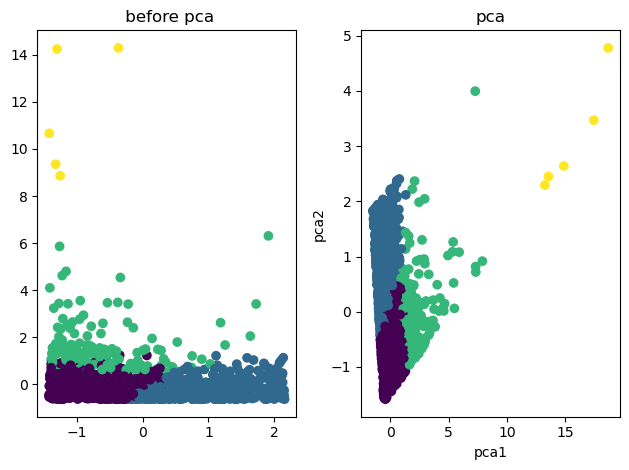

In [118]:
plt.subplot(1,2,1)
plt.scatter(d['Recency'], d['Monetary'], c=d['label'], cmap='viridis', marker='o')
plt.title(' before pca')

plt.subplot(1,2,2)
plt.scatter(ad['pca1'],ad['pca2'],c=ad['label'], cmap='viridis', marker='o')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('pca')
plt.tight_layout()

# 4

In [119]:
# 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
#  First define dependent variable with categories low value, medium value, high value
# using customer revenue.
#  Then perform Classification mode

In [120]:
rfm_df['Monetary'].describe()

count     1468.000000
mean      3676.674895
std       5846.082106
min          6.990000
25%        783.974310
50%       2011.622610
75%       4495.056630
max      87200.896260
Name: Monetary, dtype: float64

In [121]:
rfm_df['segment'] = pd.cut(rfm_df['Monetary'], bins=[0, 1000, 5000, float('inf')], labels=['Low', 'Medium', 'High'])

### MOdelling

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [123]:
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['segment']

In [124]:
y.value_counts()

Medium    697
Low       440
High      331
Name: segment, dtype: int64

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
pd.Series(Counter(y_train))

Low       355
Medium    548
High      271
dtype: int64

# Smote

In [127]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [128]:
pd.Series(Counter(y_train_resampled))

Low       548
Medium    548
High      548
dtype: int64

In [129]:
model = LogisticRegression()

model.fit(X_train_resampled,y_train_resampled)

y_train_pred = model.predict(X_train)
y_test_pred =  model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('train test ' , train_accuracy , test_accuracy)
print('\n')
print(classification_report(y_test, y_test_pred))



train test  0.8662691652470187 0.8401360544217688


              precision    recall  f1-score   support

        High       0.77      0.98      0.86        60
         Low       0.87      0.79      0.83        85
      Medium       0.86      0.81      0.84       149

    accuracy                           0.84       294
   macro avg       0.83      0.86      0.84       294
weighted avg       0.85      0.84      0.84       294



# 5 Cross-Selling

In [130]:
# 5. Cross-Selling (Which products are selling together)
#  You can perform exploratory analysis & market basket analysis to understand which
# of items can be bundled together.

In [131]:
transaction_level = df.groupby('Transaction_ID')['Product_Category'].agg(set).reset_index()
transaction_level.head(3)

,Transaction_ID,Product_Category
0,16679,{Nest-USA}
1,16680,{Nest-USA}
2,16681,{Office}


In [132]:
t = transaction_level[transaction_level['Product_Category'].apply(func= lambda x: len(x)>=2)]
t['length'] = t['Product_Category'].apply(len)
t['Product_Category'] = t['Product_Category'].apply(lambda x : tuple(x))
sku = Counter(t['Product_Category']).most_common(10)
sku

[(('Office', 'Apparel'), 545),
 (('Nest', 'Nest-USA'), 462),
 (('Drinkware', 'Apparel'), 329),
 (('Nest-USA', 'Apparel'), 245),
 (('Office', 'Drinkware'), 215),
 (('Headgear', 'Apparel'), 181),
 (('Lifestyle', 'Apparel'), 176),
 (('Bags', 'Apparel'), 170),
 (('Office', 'Lifestyle'), 134),
 (('Office', 'Drinkware', 'Apparel'), 127)]

     - these are the most frequent combinations brought by customers

# Market Basket Analysis

In [133]:
from mlxtend.frequent_patterns import apriori , association_rules

In [134]:
basket = df.groupby(['Transaction_ID','Product_Category'])['Quantity'].sum().unstack().fillna(0)
basket.head(3)

Product_Category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Transaction_ID,,,,,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [135]:
def encode_units (x):
    if x <= 0:
        return 0
    if x >=1:
        return 1

In [136]:
basket_set = basket.applymap(encode_units)
basket_set.head(1)

Product_Category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Transaction_ID,,,,,,,,,,,,,,,,,,,,
16679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [137]:
freq_items_set  =apriori(basket_set, min_support=0.02, use_colnames=True)
freq_items_set.head(1)

D:\anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.324369,(Apparel)


In [138]:
rules = association_rules(freq_items_set,  metric='lift', min_threshold=0.5)

In [139]:
rules[(rules['lift']>=1.5) & (rules['confidence']>=0.05) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(Bags),(Drinkware),0.061650,0.100714,0.021707,0.352104,3.496065,0.015498,1.388008,0.760872
9,(Drinkware),(Bags),0.100714,0.061650,0.021707,0.215531,3.496065,0.015498,1.196160,0.793924
10,(Bags),(Office),0.061650,0.140697,0.026336,0.427184,3.036208,0.017662,1.500140,0.714703
11,(Office),(Bags),0.140697,0.061650,0.026336,0.187181,3.036208,0.017662,1.154439,0.780448
12,(Drinkware),(Lifestyle),0.100714,0.068313,0.025857,0.256735,3.758203,0.018977,1.253506,0.816109
13,(Lifestyle),(Drinkware),0.068313,0.100714,0.025857,0.378505,3.758203,0.018977,1.446971,0.787728
14,(Drinkware),(Office),0.100714,0.140697,0.046287,0.459588,3.266516,0.032117,1.590089,0.771572
15,(Office),(Drinkware),0.140697,0.100714,0.046287,0.328985,3.266516,0.032117,1.340187,0.807472
16,(Office),(Lifestyle),0.140697,0.068313,0.035114,0.249575,3.653381,0.025503,1.241545,0.845197
17,(Lifestyle),(Office),0.068313,0.140697,0.035114,0.514019,3.653381,0.025503,1.768182,0.779533


    these combination could be best to sell

# 6 Predicting Next Purchase Day

In [140]:
# 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60
# days, 60-90 days, 90+ days)
#  For this, we need create dependent variable at customer level (average days per one
# transaction for only repeat customers and divide into groups 0-30 days, 30-60 days,
# 60-90 days and 90+ days) then build classification model to predict next purchase of
# given customer.

In [85]:
repeat_cust = df.groupby('CustomerID')['Transaction_ID'].count().reset_index()
repeat_cust = repeat_cust[repeat_cust['Transaction_ID']>1]
repeat_cust = df[df['CustomerID'].isin(repeat_cust['CustomerID'])]

In [86]:
eu = repeat_cust.groupby('CustomerID')['Transaction_Date'].apply(lambda x: x.diff().mean().days).reset_index().rename(columns= {'Transaction_Date': 'Avg_days'})
eu['days_label'] = pd.cut(eu['Avg_days'], bins=[-1, 30, 60, 90, float('inf')], labels=['0-30 days', '30-60 days', '60-90 days', '90+ days'])

In [145]:
eu

,CustomerID,Avg_days,days_label
0,12346,0,NaN
1,12347,3,0-30 days
2,12348,5,0-30 days
3,12350,0,NaN
4,12356,0,NaN
...,...,...,...
1397,18256,0,NaN
1398,18259,0,NaN
1399,18260,2,0-30 days
1400,18269,10,0-30 days


In [267]:
p = pd.merge(rfm_df,eu,on='CustomerID', how = 'right')

In [269]:
from sklearn.preprocessing import LabelEncoder

In [279]:
X = p[['Recency','Frequency','Monetary','segment']]

In [289]:
encode = LabelEncoder()
X['segment'] = encode.fit_transform(X['segment'])
y = p['days_label']

In [292]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [296]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

y_pred_train = rf_clf.predict(X_train)
y_pred_test  = rf_clf.predict(X_test)

accuracy_score(y_test,y_pred_test)

0.9893238434163701

# 7 Cohort Analysis

In [320]:
# Customers who started in each month and understand their behaviour
#  Which Month cohort has maximum retention?

In [361]:
df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Month', 'Coupon_Code', 'Discount_pct', 'GST', 'Date',
       'Offline_Spend', 'Online_Spend', 'Invoice', 'weekday',
       'total_marketing_spend', 'Recency', 'Frequency', 'Monetary',
       'recency_score', 'frequency_score', 'monetary_score', 'RFM_Segment'],
      dtype='object')

In [362]:
cohort = df.groupby('Month').agg({'CustomerID': 'nunique', 'Invoice' : ['count' , 'sum']})

In [365]:
cohort.columns = [['Unique_Customers', 'Total_Invoices', 'Total_Invoice_Sum']]
cohort = cohort.reset_index()

In [430]:
cohort_size = cohort.iloc[:, 1]
retention = cohort.divide(cohort_size, axis=0)

In [431]:
max_retention_month = cohort['Unique_Customers'].idxmax()
max_retention_month

Unique_Customers    7
dtype: int64

In [439]:
print("   Cohort Metrics:")
print(cohort)
print('\n')
print("      Cohort Retention Rates:")
print(retention)
print('\n\n')
print("    Month cohort with maximum retention:", max_retention_month)

   Cohort Metrics:
   Month Unique_Customers Total_Invoices Total_Invoice_Sum
0      1              215           4063      494090.54875
1      2              109           3284      375162.04730
2      3              208           4346      415157.79044
3      4              224           4150      477498.59102
4      5              200           4572      365596.02956
5      6              259           4193      361000.17429
6      7              236           5251      451878.40904
7      8              300           6150      475796.87554
8      9              193           4288      396510.49254
9     10              210           4164      480767.36981
10    11              188           3961      547788.12626
11    12              236           4502      556112.29179


      Cohort Retention Rates:
       Month Unique_Customers Total_Invoices Total_Invoice_Sum
0   0.004651              1.0      18.897674       2298.095576
1   0.018349              1.0      30.128440       3441.